<a href="https://colab.research.google.com/github/OrensteinLab/PrimerDesigner/blob/main/Cross_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install primer3-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.6 MB/s eta 0:00:00


In [2]:
import random as rand
import primer3

In [3]:
#https://www.ncbi.nlm.nih.gov/CCDS/CcdsBrowse.cgi?REQUEST=CCDS&GO=MainBrowse&DATA=CCDS86373.1
seq = """ATGCTGCTGCTGCTGCTGCTGCTGCTGCTGCTGCCGCCACTAGTCCTCAGGGTTGCTGCAAGCCGATGTC
TACATGATGAGACACAGAAGTCTGTGAGCCTTCTCAGGCCCCCTTTCTCCCAACTCCCCTCAAAATCTCG
CTCTTCCTCCCTCACCCTCCCTAGCTCCCGTGATCCTCAACCCCTACGAATCCAAAGCTGCTATCTAGGA
GATCATATATCAGATGGAGCTTGGGATCCTGAGGGAGAAGGGATGAGAGGGGGATCCCGAGCCCTGGCCG
CAGTGAGAGAGGCCACTCAGCGAATCCAGGCTGTTCTAGCAGTGCAAGGACCCCTGCTTCTGAGTCGAGA
CCCTGCACAGTATTGCCACGCTGTCTGGGGAGACCCAGATAGCCCAAACTACCACAGGTGCAGCCTCTTG
AACCCAGGATACAAAGGAGAGAGTTGCCTGGGGGCAAAGATTCCTGACACCCATCTTCGCGGTTATGCCT
TGTGGCCGGAGCAGGGTCCCCCACAACTGGTCCAGCCAGATGGGCCTGGGGTCCAAAACACTGATTTTCT
CCTGTATGTGCGAGTTGCTCACACTTCCAAGTGCCACCAAGAGACAGTCTCACTCTGTTGCCCAGGCTGG
AGTACAGCGGCCCAATCACAGCTCACCGCAGCCTTGACCTCCTGGGCTCAGAGACGGGGTTTTGTCATGT
TGCCCAGGCTGTGTCTCAAACTCTTGGGCTCAAGCAATCTGCCCACCTTGGCTTCCCAAAGTATCAGGAT
TACAGGCCCCTCTGTCATAGCCTATGCTGCCTGCTGCCAGCTGGACTCAGAAGACAGGCCCCTCGCTGGT
ACCATTGTCTACTGTGCCCAACATCTCACCAGCCCCAGCCTCAGCCACAGTGACATCGTCATGGCCACAT
TACATGAATTGCTCCATGCCTTGGGTTTCTCTGGACAGCTCTTCAAGAAATGGCGAGACTGCCCCTCAGG
ATTCAGTGTTAGAGAGAACTGTTCTACAAGGCAACTAGTGACAAGGCAAGATGAGTGGGGACAACTGCTT
CTCACCACCCCAGCTGTTAGCCTCAGCCTGGCCAAACACTTGGGAGTGTCGGGGGCTTCCCTGGGTGTTC
CCTTGGAAGAAGAGGAGGGCCTTCTGTCCTCGCACTGGGAGGCCAGACTACTCCAGGGTTCTTTAATGAC
TGCTACCTTTGATGGAGCCCAGCGCACTCGACTCGACCCAATCACCCTCGCTGCCTTCAAAGACTCAGGC
TGGTACCAGGTCAACCACAGCGCTGCAGAGGAGCTGTTGTGGGGCCAGGGATCTGGCCCAGAATTTGGCT
TGGTGACCACATGTGGGACTGGCTCCTCAGACTTCTTCTGTACTGGCAGTGGGCTGGGCTGCCACTACCT
GCACCTGGACAAGGGAAGCTGCTCCTCAGACCCCATGCTGGAAGGCTGCCGCATGTACAAGCCCTTAGCC
AATGGGAGTGAATGCTGGAAGAAGGAAAACGGATTCCCTGCTGGGGTGGATAATCCCCATGGGGAGATCT
ACCATCCCCAGAGCCGTTGCTTCTTTGCCAACCTCACTTCACAGCTGCTCCCTGGGGATAAGCCCAGGCA
TCCTTCTCTTACCCCACACCTCAAGGAAGCAGAGCTCATGGGCCGCTGCTACTTACATCAATGCACAGGG
AGGGGAGCTTACAAGGTGCAGGTGGAGGGCTCGCCTTGGGTCCCATGCCTTCCTGGAAAGGTTATACAGA
TACCTGGGTACTATGGTCTTCTCTTCTGTCCCCGGGGTCGGCTGTGTCAGACTAATGAAGATATCAATGC
TGTTACTTCCCCACCTGTGAGTCTTTCAACCCCAGATCCACTATTCCAGCTCTCTTTAGAATTAGCTGGG
CCTCCAGGACACTCTCTGGGGAAGGAACAGCAAGAAGGGCTAGCTGAAGCAGTACTGGAGGCTTTGGCGA
GCAAAGGCGGCACTGGCAGGTGCTATTTCCATGGCCCATCAATTACCACTAGCTTGGTGTTTACTGTGCA
TATGTGGAAGTCCCCTGGCTGCCAAGGGCCTTCAGTTGCTACACTGCACAAGGCCCTGACTCTGACTCTC
CAGAAAAAACCCCTAGAAGTGTATCATGGAGGAGCCAACTTTACCACACAACCCAGCAAGTTGCTGGTTA
CTTCAGACCATAATCCCTCCATGACCCACCTAAGGCTGTCCATGGGACTCTGCCTAATGCTGCTAATCCT
GGTGGGTGTAATGGGAACCACAGCCTACCAGAAAAGAGCCACTCTTCCTGTGAGACCATCTGCCTCTTAC
CATTCACCAGAGCTCCACAGCACAAGGGTCCCAGTTAGAGGAATAAGGGAGGTGTGA""".replace('\n', '')


In [5]:
primer_lmin, primer_lmax = 18,30
data = {}

In [6]:
for i in range(10000):
  length1 = rand.randint(primer_lmin, primer_lmax)
  length2 = rand.randint(primer_lmin, primer_lmax)

  start1 = rand.randint(0, len(seq) - length1)
  start2 = rand.randint(0, len(seq) - length2)

  piece1 = seq[start1: length1 + start1 + 1]
  piece2 = seq[start2: length2 + start2 + 1]

  #print(piece1, piece2)
  tm = primer3.bindings.calc_heterodimer(piece1, piece2, mv_conc=50.0, dv_conc=1.5, dntp_conc=0.6, dna_conc=50.0, temp_c=37.0, max_loop=30).tm
  #print(tm)

  data[(piece1, piece2)] = tm

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   3.,   0.,   2.,
          0.,   0.,   2.,   2.,   1.,   2.,   3.,   3.,  10.,   3.,   5.,
          7.,   3.,   2.,   6.,  10.,   4.,  10.,  10.,  12.,  13.,  24.,
         36.,  45.,  50.,  69.,  51.,  78.,  95.,  85.,  78., 126., 123.,
        135., 167., 150., 196., 202., 268., 245., 289., 290., 260., 255.,
        317., 321., 340., 327., 356., 303., 372., 374., 356., 391., 359.,
        337., 346., 322., 287., 287., 235., 206., 172., 143., 131.,  76.,
         75.,  42.,  31.,  21.,  12.,   7.,   7.,   5.,   1.,   3.,   0.,
          3.]),
 array([-126.19346345, -124.45175164, -122.71003984, -120.96832804,
        -119.22661623, -117.48490443, -115.74319262, -114.00148082,
        -112.25976902, -110.51805721, -108.77634541, -107.0346336 ,
        -105.2929218 , -103.55120999, -101.80949819, -100.06778639,
         -98.32607458,  -96.58436278,  -94.842

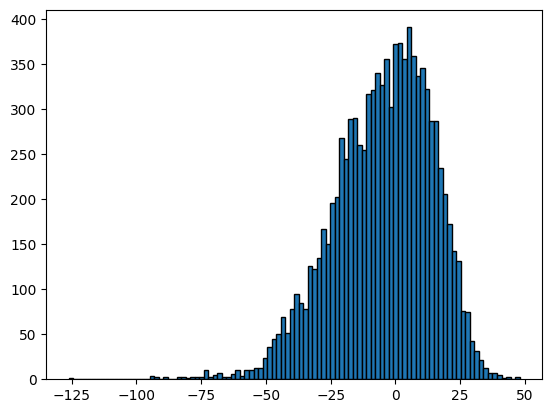

In [7]:
import matplotlib.pyplot as plt
plt.hist(data.values(), bins=100, edgecolor='black')

In [ ]:
import numpy as np #Everything below -45

In [ ]:
threshold = np.percentile(np.array(list(data.values())), 99.9)

In [ ]:
print([(pair,val) for pair, val in data.items() if val >= threshold])

[(('GAGGGGGATCCCGAGCCCTGGCCGCAG', 'CAGGTGGAGGGCTCGCCTTGGGTCCCATGCC'), 32.87480257781908), (('AACCCAGCAAGTTGCTGGTTACTTCAG', 'AACCCAGCAAGTTGCTGGTTACT'), 38.84585319911332), (('TGTGGAAGTCCCCTGGCTGCC', 'CTGGCTGCCAAGGGCCTTCAGT'), 36.39604260922249), (('TGCCTGCTGCCAGCTGGACTCAGAAG', 'CTTCTGAGTCGAGACCCTGCACAGTATTG'), 33.23619878951325), (('CCCTGCTTCTGAGTCGAGACCCTG', 'CTGCCAGCTGGACTCAGAAGACAGG'), 35.340069911226806), (('CGAGTTGCTCACACTTCCAAGTG', 'CTGGCCAAACACTTGGGAGTGTCGGGG'), 35.23115032096996), (('TGTGGGACTGGCTCCTCAGACTTC', 'CAGAAGTCTGTGAGCCTTC'), 36.84603807338607), (('GTTGCCCAGGCTGGAGTACAGCGGCCCA', 'GAGCTCATGGGCCGCTGCTACTTA'), 43.24022282034508), (('TGGCTCCTCAGACTTCTTCTGT', 'CACAGAAGTCTGTGAGCCTTCTCAGGCCCC'), 33.5393004378671), (('TAGCAGTGCAAGGACCCCTGCTTCTGAGT', 'AGCTGGACTCAGAAGACAGGCCCCTCGCTGG'), 34.67669811541202)]


In [ ]:
min(data.values())

-437.0718901819689

In [ ]:
print([(pair,val) for pair, val in data.items() if val == min(data.values())])

[(('ACCAGCCCCAGCCTCAGCCACAGTGACAT', 'CTGCTGCTGCTGCTGCTGCTGCTGCT'), -437.0718901819689), (('CTTCTCACCACCCCAGCTGT', 'CTCTTCTGTCCCCGGGGTCGGCTGTGTCA'), -437.0718901819689), (('CTCGCTGCCTTCAAAGACT', 'GCTGCTGCTGCTGCTGCCGCCACT'), -437.0718901819689), (('GGCCACATTACATGAATTGCTCCATGCCT', 'CGCTCTTCCTCCCTCACCC'), -437.0718901819689)]
